In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
lexicon_df = pd.read_table('/content/drive/MyDrive/Colab Notebooks/lexicon.tsv')

positive_lexicon_df = lexicon_df[lexicon_df['score'] > 0]

positive_lexicon_df['token'] = positive_lexicon_df['term'].apply(lambda x: x.split('_')[0])

positive_lexicon_df.head()

<ipython-input-40-12f2105b224c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_lexicon_df['token'] = positive_lexicon_df['term'].apply(lambda x: x.split('_')[0])


,term,score,token
0,horrible_noun,3.679601,horrible
1,disgusting_adj,3.493682,disgusting
2,moron_noun,3.469677,moron
3,bastard_noun,3.399238,bastard
4,stupid_noun,3.323882,stupid


In [42]:
tweets_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airline_tweets.csv', encoding='latin', header=None)

tweets_df.columns = ['id', 'tweet']

tweets_df['tokens'] = tweets_df['tweet'].apply(lambda x: word_tokenize(x.lower()))

tweets_df.head()

,id,tweet,tokens
0,class,tweet,[tweet]
1,False,@VirginAmerica What @dhepburn said.,"[@, virginamerica, what, @, dhepburn, said, .]"
2,False,@VirginAmerica plus you've added commercials t...,"[@, virginamerica, plus, you, 've, added, comm..."
3,False,@VirginAmerica I didn't today... Must mean I n...,"[@, virginamerica, i, did, n't, today, ..., mu..."
4,False,@VirginAmerica it's really aggressive to blast...,"[@, virginamerica, it, 's, really, aggressive,..."


In [44]:
def strategy_1(tokens, lexicon_tokens):
    for token in tokens:
        if token in lexicon_tokens:
            return 1
    return 0
lexicon_tokens = positive_lexicon_df['token'].tolist()

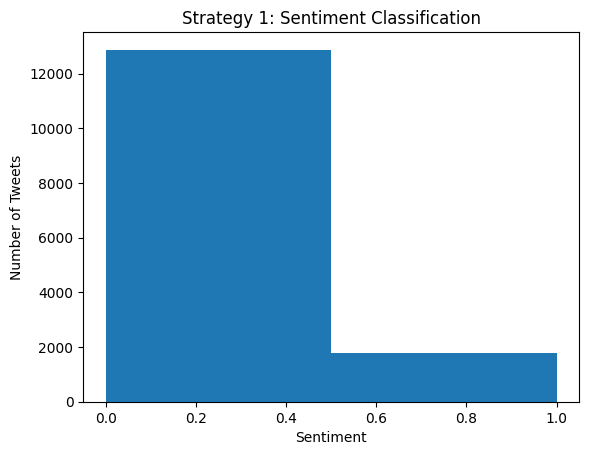

In [45]:
tweets_df['sentiment_strategy_1'] = tweets_df['tokens'].apply(lambda x: strategy_1(x, lexicon_tokens))

plt.hist(tweets_df['sentiment_strategy_1'], bins=2)
plt.title('Strategy 1: Sentiment Classification')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [48]:
def strategy_2(tokens, lexicon_tokens):
    count = 0
    for token in tokens:
        if token in lexicon_tokens:
            count += 1
    return count

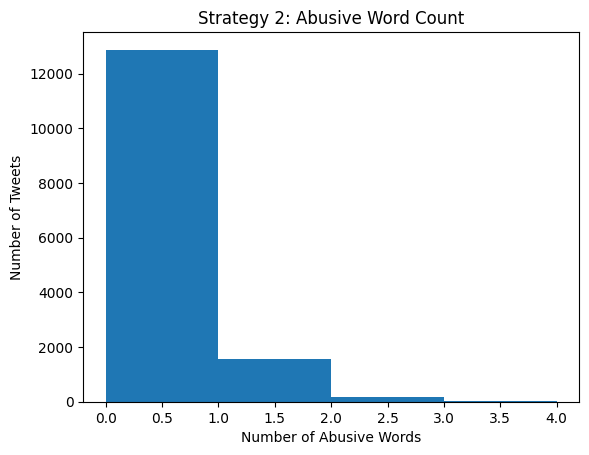

In [49]:

tweets_df['sentiment_strategy_2'] = tweets_df['tokens'].apply(lambda x: strategy_2(x, lexicon_tokens))

plt.hist(tweets_df['sentiment_strategy_2'], bins=range(0, max(tweets_df['sentiment_strategy_2']) + 1))
plt.title('Strategy 2: Abusive Word Count')
plt.xlabel('Number of Abusive Words')
plt.ylabel('Number of Tweets')
plt.show()

In [50]:
lexicon_score_dict = positive_lexicon_df.set_index('token')['score'].to_dict()

def strategy_3(tokens, lexicon_score_dict):
    score_sum = 0
    for token in tokens:
        if token in lexicon_score_dict:
            score_sum += lexicon_score_dict[token]
    return score_sum

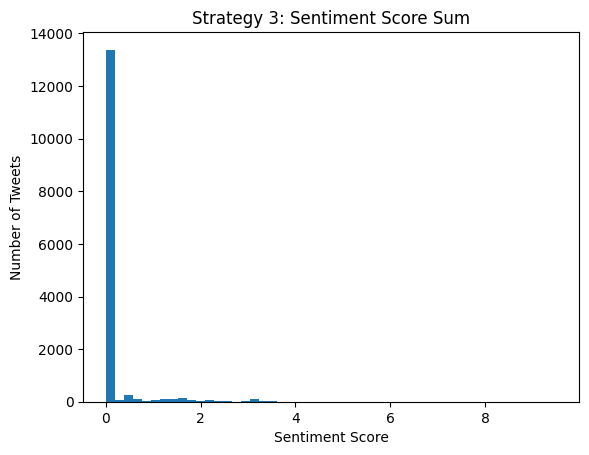

In [52]:
tweets_df['sentiment_strategy_3'] = tweets_df['tokens'].apply(lambda x: strategy_3(x, lexicon_score_dict))

plt.hist(tweets_df['sentiment_strategy_3'], bins=50)
plt.title('Strategy 3: Sentiment Score Sum')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()